In [27]:
import pandas as pd
import numpy as np

In [28]:
final_df = pd.read_csv("Final_dataset_balanced.csv")
#Show all columns
#pd.set_option('display.max_columns', None)
final_df.tail(5)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,status_code,Meta_Description,Headings,Page_Content,Word_Count
2680,mw180812.html,http://www.sam-sdelai.blogspot.com,33,www.sam-sdelai.blogspot.com,27,0,com,61.430556,0.473684,0.522907,...,0,0,0,1,0,200.0,На сайте Делай Сам Своими Руками вы найдете по...,Делай Сам Своими Руками! Pages LED пасхальные ...,Pages Posts by Admin LED ...,128.0
2681,mw51570.html,http://www.is-a-hunter.com,25,www.is-a-hunter.com,19,0,com,70.476190,0.636364,0.522907,...,0,0,0,0,0,200.0,"As a leading dynamic DNS provider, Dyn elimina...",Dynamic DNS Create an easy to remember hostnam...,Dynamic DNS Home Users Whats the solution for ...,344.0
2682,mw51096.html,http://www.quicksytes.com,24,www.quicksytes.com,18,0,com,84.446323,1.000000,0.522907,...,0,0,0,0,0,200.0,NaN,Your browser is out of date! Free Dynamic DNS ...,Remote Access Dynamic DNS Create a Free DDNS...,678.0
2683,mw134262.html,http://www.pasarwood.com,23,www.pasarwood.com,17,0,com,72.244898,1.000000,0.522907,...,0,0,0,0,0,200.0,شرکت صنایع چوبی پاسار یک شرکت فعال در زمینه طر...,تحقق رویاهای شما نصب و اجرای پروژه طراحی منحصر...,Menu ...,37.0
2684,mw143141.html,http://www.ppinds.in,19,www.ppinds.in,13,0,in,67.160494,1.000000,0.005084,...,0,1,0,1,0,200.0,Parshwa Padmavati Industries is a leading manu...,PARSHWA PADMAVATI INDUSTRIES Quick Links Conta...,Printing Packaging Gifting Company in Mumbai ...,543.0


In [87]:
text_df = final_df[["Title", "Meta_Description", "Headings", "Page_Content"]]
text_df.head(5)

,Title,Meta_Description,Headings,Page_Content
0,latinbasket,NaN,NaN,Latin American basketball News Scores Stats An...
1,dwu,NaN,WELCOME TO DAKOTA WESLEYAN UNIVERSITY INNOVATI...,Dakota Wesleyan University Learn Live and Pla...
2,bloodyelbow,Bloody Elbow has been a leading voice in comba...,Follow us on PFL champion Impa Kasanganay was ...,Bloody Elbow UFC MMA and Boxing News UFC News...
3,masoodg,NaN,NaN,NaN
4,mantoemarati,مجموعه مزون فاریون عبایا شامل طیف گسترده ای از...,مزون فاریون عبایا مدل مانتوهای مجلسی و عربی با...,Type a keyword 09023250305 ...


In [78]:
text_df.fillna("", inplace=True)
text_df["text"] = text_df["Title"] + " " + text_df["Meta_Description"] + " " + text_df["Headings"] + " " + text_df["Page_Content"]

C:\Users\Ssawka\AppData\Local\Temp\ipykernel_14292\1395457866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.fillna("", inplace=True)
C:\Users\Ssawka\AppData\Local\Temp\ipykernel_14292\1395457866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df["text"] = text_df["Title"] + " " + text_df["Meta_Description"] + " " + text_df["Headings"] + " " + text_df["Page_Content"]


In [79]:
texts = text_df["text"].tolist()

In [80]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertModel
from tqdm import tqdm

In [10]:
# Load DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
model.eval()

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:  48%|####8     | 252M/520M [00:00<?, ?B/s]

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [107]:
model.config

DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.52.3",
  "vocab_size": 30522
}

In [11]:
# Use CPU (or "cuda" if available and desired)
device = torch.device("cpu")
model.to(device)

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [12]:
inputs = tokenizer(
    texts,
    padding=True,
    truncation=True,
    return_tensors="pt",
    max_length=512
)

In [13]:
# Create DataLoader
batch_size = 32
dataset = TensorDataset(inputs["input_ids"], inputs["attention_mask"])
dataloader = DataLoader(dataset, batch_size=batch_size)


In [14]:
# Inference
features = []
with torch.no_grad():
    for input_ids_batch, attention_mask_batch in tqdm(dataloader, desc="Extracting embeddings"):
        input_ids_batch = input_ids_batch.to(device)
        attention_mask_batch = attention_mask_batch.to(device)

        outputs = model(input_ids=input_ids_batch, attention_mask=attention_mask_batch)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # [CLS] token
        features.append(cls_embeddings.cpu())

Extracting embeddings: 100%|██████████| 84/84 [24:15<00:00, 17.32s/it]


In [108]:
# Stack all embeddings into a single NumPy array
X_bert = torch.cat(features).numpy()

In [ ]:
np.save("bert_embeddings_duplicates_drop.npy", X_bert) 

Startinn point


In [147]:
X_bert = np.load("bert_embeddings.npy")

In [148]:
y = final_df["label"].values
#np.save("labels.npy", y)

In [4]:
final_df = final_df.drop_duplicates()

In [5]:
pd.set_option('display.max_columns', None)
final_df.head(5)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,status_code,Meta_Description,Headings,Page_Content,Word_Count
0,711514.html,https://www.latinbasket.com,26,www.latinbasket.com,19,0,com,100.0,1.0,0.522907,0.061233,3,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,1399,864,1,latinbasket,100.0,100.0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,1,67,6,16,228,1,491,1,200.0,NaN,NaN,Latin American basketball News Scores Stats An...,3509.0
1,434282.html,https://www.dwu.edu,18,www.dwu.edu,11,0,edu,100.0,1.0,0.011501,0.038517,3,1,0,0,0.0,5,0.278,0,0.0,0,0,0,1,0.056,1,1013,664,1,dwu,100.0,100.0,0,0,1,0,0,0,0,2,1,1,0,1,0,0,1,0,1,38,6,9,209,10,168,1,200.0,NaN,WELCOME TO DAKOTA WESLEYAN UNIVERSITY INNOVATI...,Dakota Wesleyan University Learn Live and Pla...,596.0
2,29623.html,https://www.bloodyelbow.com,26,www.bloodyelbow.com,19,0,com,100.0,1.0,0.522907,0.058297,3,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,5831,29660,1,bloodyelbow,100.0,100.0,1,0,1,0,0,1,0,4,0,1,1,1,0,1,1,1,1,101,4,17,220,0,272,1,200.0,Bloody Elbow has been a leading voice in comba...,Follow us on PFL champion Impa Kasanganay was ...,Bloody Elbow UFC MMA and Boxing News UFC News...,796.0
3,655251.html,https://www.masoodg.com,22,www.masoodg.com,15,0,com,100.0,1.0,0.522907,0.070804,3,1,0,0,0.0,9,0.409,0,0.0,0,0,0,1,0.045,1,4733,6440,1,masoodg,100.0,100.0,0,0,0,1,0,0,17,24,0,1,1,0,0,1,0,0,1,43,48,19,291,1,335,1,200.0,NaN,NaN,NaN,0.0
4,546945.html,https://www.mantoemarati.com,27,www.mantoemarati.com,20,0,com,100.0,1.0,0.522907,0.073443,3,1,0,0,0.0,14,0.519,0,0.0,0,0,0,1,0.037,1,1147,10548,1,mantoemarati,100.0,100.0,1,1,1,0,0,1,0,4,1,1,1,1,0,0,1,0,1,10,32,40,118,0,121,1,200.0,مجموعه مزون فاریون عبایا شامل طیف گسترده ای از...,مزون فاریون عبایا مدل مانتوهای مجلسی و عربی با...,Type a keyword 09023250305 ...,19.0


In [57]:
#Domain, TLD add  - One Hot encoding
#NoOfObfuscatedChar, CharContinuationRate - 0 everywhere
#NoOfCSS -addded

test_df = final_df[["LineOfCode", "LetterRatioInURL", "NoOfCSS", "DegitRatioInURL", "NoOfPopup", "HasExternalFormSubmit", "NoOfImage","HasSubmitButton", "HasHiddenFields", "HasPasswordField", "SpacialCharRatioInURL", "URLLength", "DomainLength", "TLDLength", "IsDomainIP", "NoOfSubDomain", "label", "IsHTTPS", "HasTitle", "LargestLineLength","HasFavicon","NoOfURLRedirect", "HasDescription","HasCopyrightInfo","NoOfJS", "Word_Count"]]
pd.set_option('display.max_columns', None)
test_df.head(5)

,LineOfCode,LetterRatioInURL,NoOfCSS,DegitRatioInURL,NoOfPopup,HasExternalFormSubmit,NoOfImage,HasSubmitButton,HasHiddenFields,HasPasswordField,SpacialCharRatioInURL,URLLength,DomainLength,TLDLength,IsDomainIP,NoOfSubDomain,label,IsHTTPS,HasTitle,LargestLineLength,HasFavicon,NoOfURLRedirect,HasDescription,HasCopyrightInfo,NoOfJS,Word_Count
0,1399,0.500,6,0.0,0,0,67,0,0,0,0.038,26,19,3,0,1,1,1,1,864,1,1,1,1,16,3509.0
1,1013,0.278,6,0.0,0,1,38,0,1,0,0.056,18,11,3,0,1,1,1,1,664,0,0,0,1,9,596.0
2,5831,0.500,4,0.0,0,0,101,1,1,0,0.038,26,19,3,0,1,1,1,1,29660,1,0,1,1,17,796.0
3,4733,0.409,48,0.0,17,0,43,1,0,0,0.045,22,15,3,0,1,1,1,1,6440,0,1,0,1,19,0.0
4,1147,0.519,32,0.0,0,1,10,1,1,0,0.037,27,20,3,0,1,1,1,1,10548,1,0,1,1,40,19.0


In [165]:
test_df_2 = final_df[["LineOfCode", "HasCopyrightInfo", "HasTitle", "HasExternalFormSubmit", "NoOfSubDomain", "NoOfURLRedirect", "NoOfJS", "HasSubmitButton", "NoOfCSS", "label"]]

In [166]:
X_num = test_df_2.drop(columns=["label"], errors='ignore').values

In [167]:
X_combined = np.hstack((X_bert, X_num))

In [168]:
y = test_df_2["label"].values

In [193]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    n_estimators=500,        # increased to compensate lower learning rate
    learning_rate=0.001,     # lowered learning rate for better generalization
    max_depth=5,             # shallower trees reduce overfitting
    min_child_weight=5,      # higher value to avoid overfitting on small data
    eval_metric='logloss'
)
                              
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\Ssawka\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:44:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.89      0.61      0.72       161
           1       0.78      0.95      0.86       242

    accuracy                           0.81       403
   macro avg       0.84      0.78      0.79       403
weighted avg       0.83      0.81      0.81       403



In [146]:
# Save model to file
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [162]:
import pandas as pd
import numpy as np

# Assuming your features are in a DataFrame `df_features` or numpy array `X_num`
# and your labels are in `y`

if isinstance(X_num, np.ndarray):
    for i in range(X_num.shape[1]):
        if np.array_equal(X_num[:, i], y):
            print(f"Feature {i} is identical to the label!")


In [164]:
X_combined = np.hstack([X_bert, X_num_filtered])

NameError: name 'X_num_filtered' is not defined

In [107]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X_combined)


In [108]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_combined)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, y)


In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.15, random_state=42, shuffle = True)


from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
X_train[:, -X_num.shape[1]:] = scaler.fit_transform(X_train[:, -X_num.shape[1]:])
X_test[:, -X_num.shape[1]:] = scaler.transform(X_test[:, -X_num.shape[1]:])


# Train model
clf = RandomForestClassifier(n_estimators=50, max_depth = 5, min_samples_split = 2, min_samples_leaf=1)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       161
           1       0.82      0.95      0.88       242

    accuracy                           0.85       403
   macro avg       0.86      0.82      0.83       403
weighted avg       0.86      0.85      0.84       403



In [175]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

y_test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


Train accuracy: 0.9855
Test accuracy: 0.9603


c:\Users\Ssawka\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:46:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ssawka\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:46:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ssawka\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:46:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ssawka\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:46:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

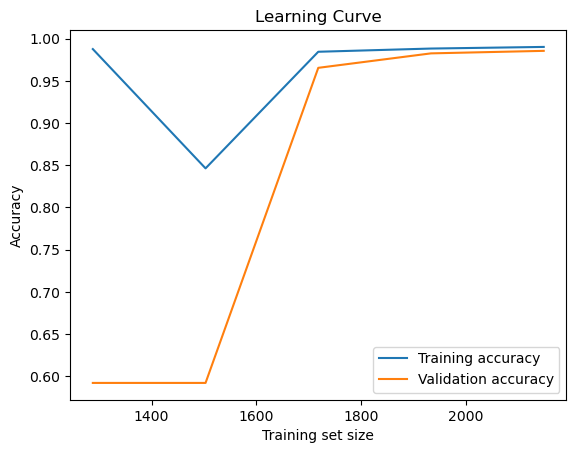

In [196]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_combined, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve')
plt.show()


In [16]:
print("X_combined shape:", X_combined.shape)
print("y shape:", y.shape)
print("Sample y:", y[:10])
print("Sample X_combined:", X_combined[:2])


X_combined shape: (2685, 794)
y shape: (2685,)
Sample y: [1 1 1 1 1 1 1 1 1 1]
Sample X_combined: [[-5.66173315e-01  1.87545553e-01  1.84041888e-01 ...  1.00000000e+00
   1.60000000e+01  3.50900000e+03]
 [-1.34194925e-01 -1.21473275e-01 -1.17810771e-01 ...  1.00000000e+00
   9.00000000e+00  5.96000000e+02]]


In [21]:
print("Train labels distribution:", np.unique(y_train, return_counts=True))
print("Test labels distribution:", np.unique(y_test, return_counts=True))


Train labels distribution: (array([0, 1], dtype=int64), array([ 880, 1268], dtype=int64))
Test labels distribution: (array([0, 1], dtype=int64), array([215, 322], dtype=int64))


In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_combined, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.99255121 1.         0.98324022 0.98510242 0.99255121]
Mean accuracy: 0.9906890130353817


In [143]:
import joblib

# Save model to file
joblib.dump(clf, 'random_forest_model_2.pkl')

['random_forest_model_2.pkl']

In [144]:
joblib.dump(scaler, 'scaler_2.pkl')

['scaler_2.pkl']

In [76]:
# Remove label column first
df_num_clean = test_df_2.drop(columns=["label"])

# Save feature names before converting to numpy
num_feature_names = df_num_clean.columns.tolist()

# Convert to numpy
X_num = df_num_clean.values


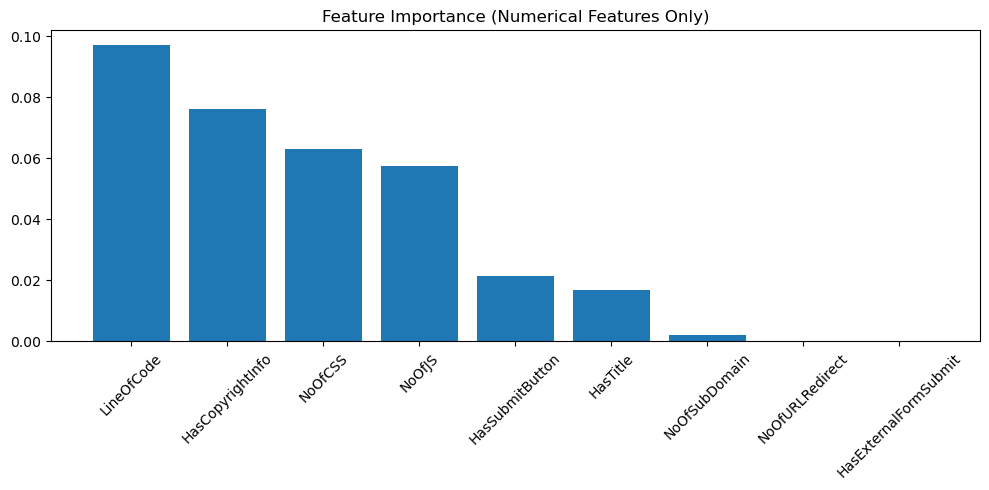

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_feature_importances = xgb_model.feature_importances_[-X_num.shape[1]:]
indices = np.argsort(num_feature_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importance (Numerical Features Only)")
plt.bar(range(len(num_feature_importances)), num_feature_importances[indices])
plt.xticks(range(len(num_feature_importances)), [num_feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()



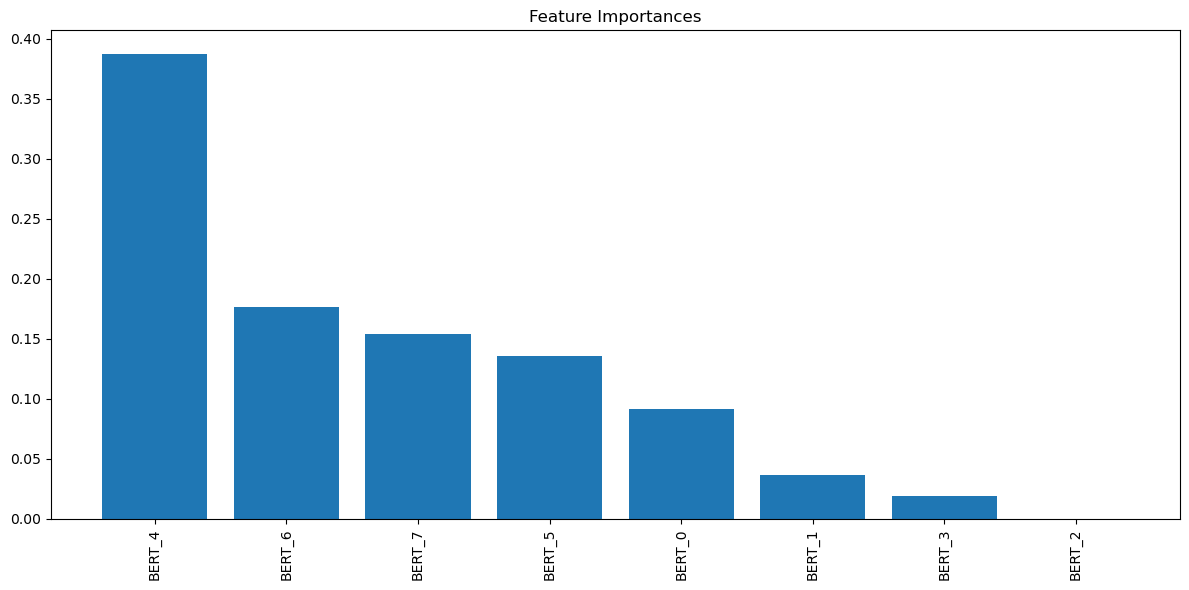

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf is your trained model
importances = clf.feature_importances_

# If you have feature names (e.g., BERT + numerical)
feature_names = [f"BERT_{i}" for i in range(X_bert.shape[1] - X_num.shape[1])] + list(numerical_df.columns)

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


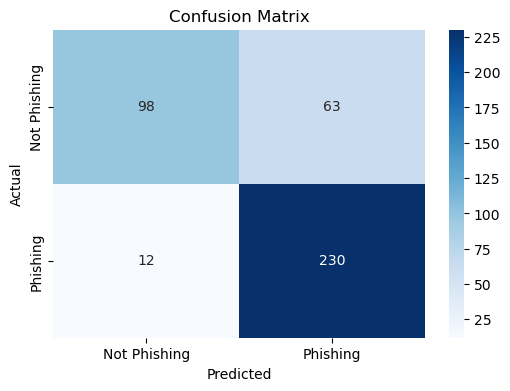

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = xgb_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Phishing', 'Phishing'], yticklabels=['Not Phishing', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [195]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
specificity = tn / (tn + fp)
accuracy = (tp +tn) / (tp + fp+tn+fn)
sensitivity = tp/ (tp + fn)

print("Precision:", precision)
print("Specificity:", specificity)

print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)

Precision: 0.7849829351535836
Specificity: 0.6086956521739131
Accuracy: 0.8138957816377171
Sensitivity: 0.9504132231404959


In [159]:
import numpy as np

train_set = set([tuple(row) for row in X_train])
test_set = set([tuple(row) for row in X_test])

overlap = train_set.intersection(test_set)
print(f"Number of duplicate rows in train and test: {len(overlap)}")


Number of duplicate rows in train and test: 10
